# Attempting a strategy that could be used in Geosite within Python

* **This will strategy will mainly attempt to create a solution for the following:**

    - How would we implement batch processing. What if we wanted to process 10,000 images using
        your script?
    - The challenge image was very simple in that it had a black background. In reality, there would
        be imagery in the background. What problems might that cause?
    - How would you design a function that would take plume imagery and return the x and y
        coordinates of the source of a plume?
    - How would you design a function that would take plume imagery and return a count of the
        number of plumes?

## 1.1 Let's start by using Matplotlib and Numpy for the first steps in our solution

In [5]:
# Import the necessary modules

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [6]:
# Lets import our images as multi-dimensional arrays (3 dimensions)

plume_1 = plt.imread('plume_1.jpeg')
plume_2 = plt.imread('plume_2.jpeg')

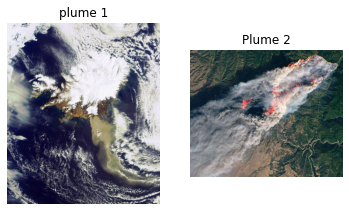

In [7]:
# Let's show each image...
fig, axes = plt.subplots(nrows=1, ncols=2)
plumes = [plume_1, plume_2]
titles = ["plume 1", "Plume 2"]
for ax, plume, title in zip(axes.flat, plumes, titles):
    ax.imshow(plume, cmap=None)
    ax.set(title=title)
    ax.axis('off')
plt.show()

In [8]:
# Image Details:
print(f'''
Here we see the image shape {plume_1.shape}, and the size for plume_1 {plume_1.size}

Here we see the image shape {plume_2.shape}, and the for plume_2 {plume_2.size}''')


Here we see the image shape (2000, 1685, 3), and the size for plume_1 10110000

Here we see the image shape (500, 600, 3), and the for plume_2 900000


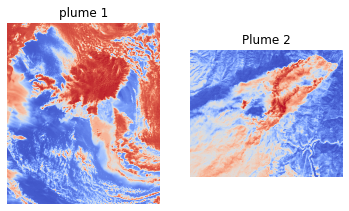

In [9]:
# Now let's change the color scheme for both plumes so they can be more easily recognized.
c_plume_1 = plume_1[:, :, 0]
c_plume_2 = plume_2[:, :, 0]

# Now, let's show each image with the applied color map.
fig, axes = plt.subplots(nrows=1, ncols=2)
plumes = [c_plume_1, c_plume_2]
titles = ["plume 1", "Plume 2"]
for ax, plume, title in zip(axes.flat, plumes, titles):
    ax.imshow(plume, cmap="coolwarm")
    ax.set(title=title)
    ax.axis('off')
plt.show()

array([[241, 237, 233, ..., 225, 225, 224],
       [238, 239, 240, ..., 226, 225, 224],
       [234, 238, 241, ..., 225, 224, 223],
       ...,
       [ 20,  19,  19, ...,  33,  36,  38],
       [ 20,  20,  20, ...,  33,  35,  30],
       [ 19,  19,  20, ...,  30,  26,  22]], dtype=uint8)

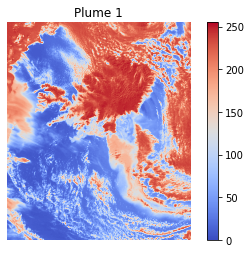

In [10]:
# Now, let's try to map out where the origin of the plume. 
#(We can also print out the array of this image to locate the values.)
plt.imshow(c_plume_1, cmap='coolwarm')
plt.title("Plume 1")
plt.axis("off")
plt.colorbar();
c_plume_1

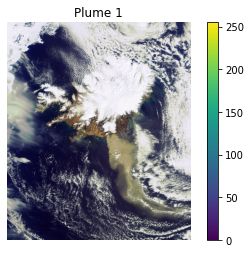

In [11]:
# Let's compare this to the original image along side its array.
# (The color bar includes default color map.)
plt.imshow(plume_1)
plt.title("Plume 1")
plt.axis("off")
cbt = plt.colorbar();

## 1.2 Now that we've experimented with using the plot features, it's now time to use Matplotlib's image tools.

In [35]:
# Let's re-import our images and modules
import matplotlib.pyplot as plt
import matplotlib.image as img

In [36]:
# Lets import our images as multi-dimensional arrays (3 dimensions)
plume_1 = img.imread('plume_1.jpeg')
plume_2 = img.imread('plume_2.jpeg')
print(f'''
Here is the array for the fist plume:

{plume_1}

Here is the array for the second plume:

{plume_2}''')


Here is the array for the fist plume:

[[[241 240 248]
  [237 236 244]
  [233 232 240]
  ...
  [225 221 222]
  [225 223 228]
  [224 222 227]]

 [[238 237 245]
  [239 238 246]
  [240 239 247]
  ...
  [226 223 214]
  [225 225 215]
  [224 224 214]]

 [[234 233 241]
  [238 237 245]
  [241 240 248]
  ...
  [225 224 206]
  [224 226 205]
  [223 225 204]]

 ...

 [[ 20  22  71]
  [ 19  21  69]
  [ 19  21  69]
  ...
  [ 33  39  87]
  [ 36  41  96]
  [ 38  46  85]]

 [[ 20  20  70]
  [ 20  20  70]
  [ 20  21  69]
  ...
  [ 33  46  81]
  [ 35  46  92]
  [ 30  43  75]]

 [[ 19  19  69]
  [ 19  19  69]
  [ 20  21  69]
  ...
  [ 30  32  80]
  [ 26  30  65]
  [ 22  27  59]]]

Here is the array for the second plume:

[[[123 147 147]
  [ 50  74  74]
  [ 62  86  88]
  ...
  [ 38  56  40]
  [ 32  46  31]
  [ 73  86  69]]

 [[ 98 120 118]
  [ 37  59  57]
  [107 128 129]
  ...
  [ 84 102  86]
  [ 67  84  68]
  [ 92 105  88]]

 [[ 64  83  79]
  [114 133 129]
  [ 50  69  67]
  ...
  [ 87 105  89]
  [100 117

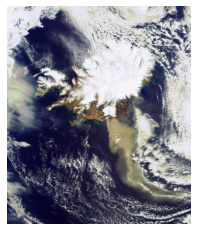

In [37]:
plume_1 = plt.imshow(plume_1)
plt.axis("off");

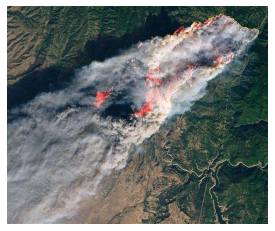

In [38]:
# We see here that our images come out in slightly better resolution...
plume_2 = plt.imshow(plume_2)
plt.axis("off");

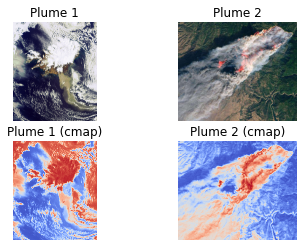

In [39]:
# Now, let's do the same things we did before, but this time focused more on imaging
# Now let's change the color scheme for both plumes so they can be more easily recognized.
plume_1 = img.imread('plume_1.jpeg')
plume_2 = img.imread('plume_2.jpeg')

c_plume_1 = plume_1[:, :, 0]
c_plume_2 = plume_2[:, :, 0]

# Now, let's show each image with the applied color map.
fig, axes = plt.subplots(nrows=2, ncols=2)
plumes = [plume_1, plume_2, c_plume_1, c_plume_2]
titles = ["Plume 1", "Plume 2", "Plume 1 (cmap)", "Plume 2 (cmap)"]
for ax, plume, title in zip(axes.flat, plumes, titles):
    ax.imshow(plume, cmap="coolwarm")
    ax.set(title=title)
    ax.axis('off')
plt.show();

In [40]:
# Now that we've successfully followed the same format, let's read the arrays for the new images.
print(f'''
Color mapped Plume 1 array:

{c_plume_1}

Color mapped Plume 2 array:

{c_plume_2}
''')


Color mapped Plume 1 array:

[[241 237 233 ... 225 225 224]
 [238 239 240 ... 226 225 224]
 [234 238 241 ... 225 224 223]
 ...
 [ 20  19  19 ...  33  36  38]
 [ 20  20  20 ...  33  35  30]
 [ 19  19  20 ...  30  26  22]]

Color mapped Plume 2 array:

[[123  50  62 ...  38  32  73]
 [ 98  37 107 ...  84  67  92]
 [ 64 114  50 ...  87 100 151]
 ...
 [147 138 134 ...  34  26  22]
 [152 138 132 ...  32  18  19]
 [159 142 133 ...  41  25  32]]



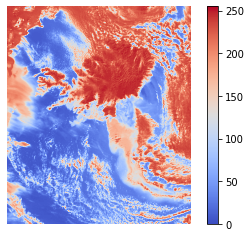

In [41]:
# Let's set the color bar for these images as well...

c_plume_1 = plume_1[:, :, 0]
plt.axis("off")
plt.imshow(c_plume_1, cmap="coolwarm")
plt.colorbar();

In [42]:
array_1 = np.array(c_plume_1)
c_plume_1 == array_1
array_1.shape

(2000, 1685)

In [49]:
# Let's now try to solve the location origin of the plume... Perhaps we could locate and group the
# highest array values, and leave markers there? As some sort of plot? True or false... maybe?


#for x in array_1:
    #for y in x:
        #if y >= 255:
            #print(x)


# Nice!!! So, with this we can now isolate the values that are the highest within
# the heat map. So, now we have a way to locate the highest values, And this helps
# us to determine where our origin spot is.

**This function works well, but prints alot of items. Prints any of the 1685 values of the 2000 rows that are greater >= to 250**

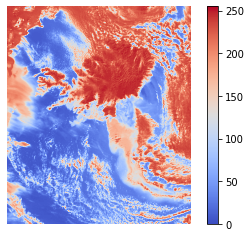

In [44]:
# Let's set the color bar for the images again...

c_plume_1 = plume_1[:, :, 0]
plt.axis("off")
plt.imshow(c_plume_1, cmap="coolwarm")
plt.colorbar();

In [45]:
# Let's examine our array shape once more...
array_1 = np.array(c_plume_1)
c_plume_1 == array_1
array_1.shape

(2000, 1685)

In [46]:
# So, we know there are 2000 rows (or lists) with 1685 items (in each list) within our picture array...
# How would we specify our values even more? Well, perhaps we can continue to iterate through our list
# to figure out what our highest pixel values are.

# First, let's get a close range to see what the highest sum of one value could be. (Coordinates with
# the highest values on the color bar... this is so great!)

In [47]:
1685 * 250

421250

In [48]:
# Let's isolate even more specific pixel values for our picture.

for x in array_1:
    if x.sum() > 340000:
        for y in x:
            if y >= 225:
                continue
            else:
                pass
        print(x)
        

# We're starting to get somewhere now... this is great!
# So now we have some of the highest pixel values of the image...
# Now we need to find a way to plot them on our image.

[241 237 233 ... 225 225 224]
[238 239 240 ... 226 225 224]
[234 238 241 ... 225 224 223]
[236 236 238 ... 224 223 223]
[237 238 240 ... 228 227 228]
[232 235 238 ... 228 227 228]
[235 235 237 ... 227 226 227]
[236 240 244 ... 230 227 227]
[243 244 241 ... 231 232 230]
[240 239 238 ... 237 230 229]


**We've done it! We've successfully isolated the highest color values within our plot!**
 * With this data, there's a good chance we can locate the origin source of our plume.